<a href="https://colab.research.google.com/github/AnassMamouni/AnassMamouni/blob/main/ProjetR%C3%A9gression-Car%20Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df=pd.read_csv('/content/cars_data.csv')
print(df.head())


           model  year    price transmission  mileage fuelType  tax   mpg  \
0            I10  2017   7495.0       Manual    11630   Petrol  145  60.1   
1           Polo  2017  10989.0       Manual     9200   Petrol  145  58.9   
2       2 Series  2019  27990.0    Semi-Auto     1614   Diesel  145  49.6   
3   Yeti Outdoor  2017  12495.0       Manual    30960   Diesel  150  62.8   
4         Fiesta  2017   7999.0       Manual    19353   Petrol  125  54.3   

   engineSize Manufacturer  
0         1.0       hyundi  
1         1.0   volkswagen  
2         2.0          BMW  
3         2.0        skoda  
4         1.2         ford  

📊 Dimensions : (97712, 10)


In [6]:
print(f"\n📊 Dimensions : {df.shape}")


📊 Dimensions : (97712, 10)


In [7]:
print("\nInfos sur le dataset :")
print(df.info())


Infos sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         96727 non-null  float64
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      93586 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           94256 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 7.5+ MB
None


In [8]:
print("\nDescription statistique :")
print(df.describe())


Description statistique :
               year          price        mileage           tax           mpg  \
count  97712.000000   96727.000000   97712.000000  97712.000000  94256.000000   
mean    2017.066502   16774.299823   23219.475499    120.142408     55.228326   
std        2.118661    9874.715050   21060.882301     63.357250     16.296400   
min     1970.000000     450.000000       1.000000      0.000000      0.300000   
25%     2016.000000    9999.000000    7673.000000    125.000000     47.100000   
50%     2017.000000   14471.000000   17682.500000    145.000000     54.300000   
75%     2019.000000   20750.000000   32500.000000    145.000000     62.800000   
max     2024.000000  159999.000000  323000.000000    580.000000    470.800000   

         engineSize  
count  97712.000000  
mean       1.664913  
std        0.558574  
min        0.000000  
25%        1.200000  
50%        1.600000  
75%        2.000000  
max        6.600000  


In [10]:
print("\n" + "="*50)
print("PRÉPARATION DES DONNÉES")
print("="*50)


PRÉPARATION DES DONNÉES


In [11]:
print("\nValeurs manquantes :")
print(df.isna().sum())


Valeurs manquantes :
model              0
year               0
price            985
transmission       0
mileage            0
fuelType        4126
tax                0
mpg             3456
engineSize         0
Manufacturer       0
dtype: int64


In [12]:
# Supprimer les valeurs manquantes
df = df.dropna()
print(f"Dataset après nettoyage : {df.shape}")

Dataset après nettoyage : (93586, 10)


In [13]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(f"\nColonnes catégorielles : {categorical_cols}")


Colonnes catégorielles : ['model', 'transmission', 'fuelType', 'Manufacturer']


In [14]:
# Afficher les valeurs uniques des colonnes catégorielles
print("\nValeurs uniques par colonne catégorielles :")
for col in categorical_cols:
    print(f"  {col}: {df[col].nunique()} valeurs")


Valeurs uniques par colonne catégorielles :
  model: 196 valeurs
  transmission: 4 valeurs
  fuelType: 5 valeurs
  Manufacturer: 9 valeurs


In [15]:
# Encodage des variables catégorielles (One-Hot Encoding)
print("\nEncodage des variables catégorielles...")
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(f"✅ Nombre de colonnes après encodage : {df_encoded.shape[1]}")


Encodage des variables catégorielles...
✅ Nombre de colonnes après encodage : 216


In [16]:
# 4. Séparation features / cible
# =========================
print("\n" + "="*50)
print("SÉPARATION FEATURES / CIBLE")
print("="*50)


SÉPARATION FEATURES / CIBLE


In [17]:
# Identifier la colonne cible (prix)
target_col = "Price" if "Price" in df.columns else "price"
if target_col not in df_encoded.columns:
    # Essayer d'autres noms possibles
    price_cols = [col for col in df.columns if "price" in col.lower() or "cost" in col.lower()]
    target_col = price_cols[0] if price_cols else df.columns[-1]

print(f"Colonne cible : {target_col}")

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

print(f"\nDimensions :")
print(f"  X (features) : {X.shape}")
print(f"  y (cible)    : {y.shape}")

Colonne cible : price

Dimensions :
  X (features) : (93586, 215)
  y (cible)    : (93586,)


In [18]:
# 5. Division train / test
# =========================
print("\n" + "="*50)
print("DIVISION TRAIN / TEST")
print("="*50)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nX_train : {X_train.shape}")
print(f"X_test  : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test  : {y_test.shape}")


DIVISION TRAIN / TEST

X_train : (74868, 215)
X_test  : (18718, 215)
y_train : (74868,)
y_test  : (18718,)


In [19]:
# 6. Modélisation : Régression Linéaire
# =========================
print("\n" + "="*50)
print("MODÉLISATION - RÉGRESSION LINÉAIRE")
print("="*50)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"\n✅ Modèle entraîné avec succès !")
print(f"Intercept : {model.intercept_:,.2f}")


MODÉLISATION - RÉGRESSION LINÉAIRE

✅ Modèle entraîné avec succès !
Intercept : -2,816,659.21


In [20]:
# Top 10 coefficients les plus importants
print("\nTop 10 coefficients les plus importants :")
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
coef_df["Abs_Coefficient"] = np.abs(coef_df["Coefficient"])
coef_df_sorted = coef_df.sort_values("Abs_Coefficient", ascending=False)
print(coef_df_sorted.head(10).to_string(index=False))


Top 10 coefficients les plus importants :
          Feature  Coefficient  Abs_Coefficient
   model_ G Class 58645.525758     58645.525758
        model_ R8 48640.500794     48640.500794
        model_ i8 41990.749057     41990.749057
        model_ i3 41797.135233     41797.135233
        model_ X7 40052.065134     40052.065134
  model_ 8 Series 32141.130366     32141.130366
model_ California 32057.201509     32057.201509
        model_ M5 23382.643154     23382.643154
        model_ Q8 20553.706196     20553.706196
    model_ Ampera 18961.122374     18961.122374


In [22]:
# =========================
# 7. Prédictions et évaluation
# =========================
print("\n" + "="*50)
print("PRÉDICTIONS ET ÉVALUATION")
print("="*50)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))

print(f"\n📊 RÉSULTATS :")
print(f"  MSE (Mean Squared Error)   : {mse:,.2f}")
print(f"  RMSE (Root Mean Squared Error) : {rmse:,.2f}")
print(f"  R² (Coefficient of Determination) : {r2:.4f}")
print(f"  MAE (Mean Absolute Error)   : {mae:,.2f}")




PRÉDICTIONS ET ÉVALUATION

📊 RÉSULTATS :
  MSE (Mean Squared Error)   : 13,979,032.09
  RMSE (Root Mean Squared Error) : 3,738.85
  R² (Coefficient of Determination) : 0.8582
  MAE (Mean Absolute Error)   : 2,271.81


In [23]:
# Interprétation du R²
print(f"\n💡 Interprétation du R² = {r2:.4f} :")
if r2 > 0.8:
    print("  ✅ Excellent ! Le modèle explique bien la variance des données.")
elif r2 > 0.6:
    print("  ✔️ Bon ! Le modèle explique correctement les données.")
elif r2 > 0.4:
    print("  ⚠️ Acceptable. Le modèle pourrait être amélioré.")
else:
    print("  ❌ Le modèle linéaire ne semble pas adapté à ces données.")


💡 Interprétation du R² = 0.8582 :
  ✅ Excellent ! Le modèle explique bien la variance des données.



VISUALISATIONS


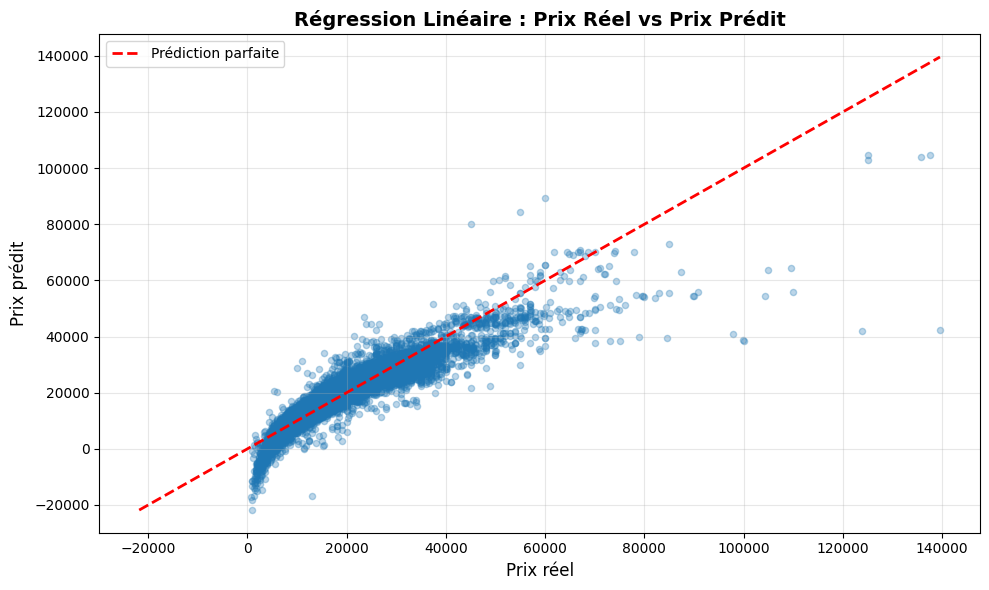

In [24]:
# 8. Visualisation 1 : Prédictions vs Réalité
# =========================
print("\n" + "="*50)
print("VISUALISATIONS")
print("="*50)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, s=20)

# Ajouter la ligne de prédiction parfaite
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label="Prédiction parfaite")

plt.xlabel("Prix réel", fontsize=12)
plt.ylabel("Prix prédit", fontsize=12)
plt.title("Régression Linéaire : Prix Réel vs Prix Prédit", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

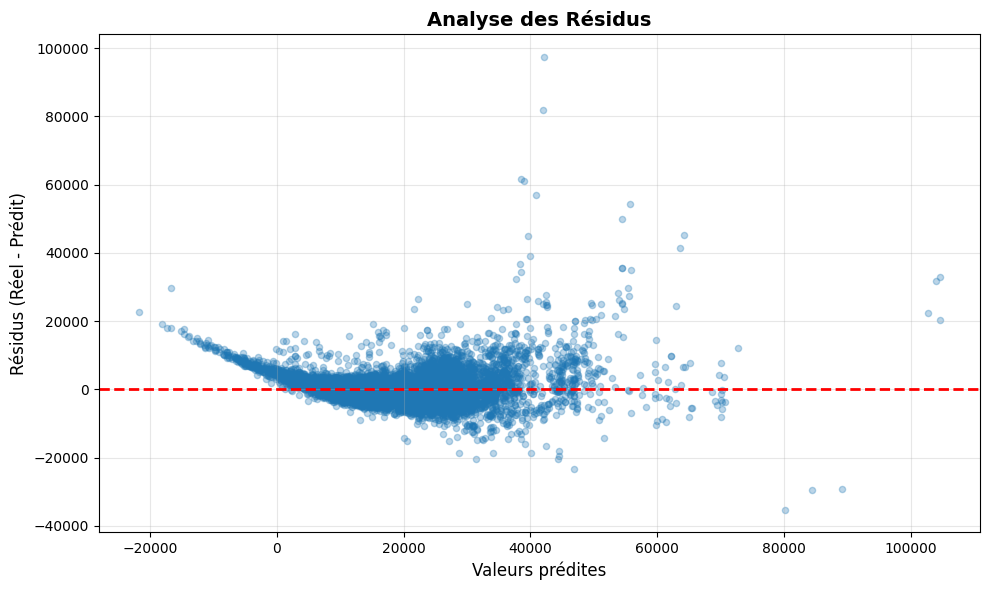

In [25]:
# 9. Visualisation 2 : Résidus
# =========================
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3, s=20)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Valeurs prédites", fontsize=12)
plt.ylabel("Résidus (Réel - Prédit)", fontsize=12)
plt.title("Analyse des Résidus", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [26]:
# 10. Exemples de prédictions
# =========================
print("\nExemples de prédictions sur le test set :")
results_df = pd.DataFrame({
    "Prix_Réel": y_test.values[:15],
    "Prix_Prédit": y_pred[:15],
    "Erreur_Absolue": np.abs(y_test.values[:15] - y_pred[:15]),
    "Erreur_%": (np.abs(y_test.values[:15] - y_pred[:15]) / y_test.values[:15] * 100)
})
print(results_df.to_string(index=False))

print("\n" + "="*50)
print("✅ PROJET TERMINÉ !")
print("="*50)


Exemples de prédictions sur le test set :
 Prix_Réel  Prix_Prédit  Erreur_Absolue  Erreur_%
   10320.0 11504.443757     1184.443757 11.477168
    7980.0  8618.563414      638.563414  8.002048
   35995.0 30400.715777     5594.284223 15.541837
   18200.0 18753.686232      553.686232  3.042232
    5590.0  4316.643411     1273.356589 22.779188
    9471.0 13234.410165     3763.410165 39.736144
    7698.0  8466.684767      768.684767  9.985513
   28998.0 24836.837360     4161.162640 14.349826
   14150.0 13156.579383      993.420617  7.020640
   23995.0 22235.477543     1759.522457  7.332871
   12990.0 14169.147117     1179.147117  9.077345
   16272.0 18759.626707     2487.626707 15.287775
    5500.0  4212.185979     1287.814021 23.414800
   19750.0 21256.408302     1506.408302  7.627384
   23000.0 26487.564887     3487.564887 15.163326

✅ PROJET TERMINÉ !
